In [ ]:
!pip install pyspark
from google.colab import files
fileuploaded = files.upload()



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.3/317.3 MB 2.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.2-py2.py3-none-any.whl size=317812365 sha256=6b42b18530c40361a8700191a5bceddcb8c932540fdd745df149991b7964c21a
  Stored in directory: /root/.cache/pip/wheels/34/34/bd/03944534c44b677cd5859f248090daa9fb27b3c8f8e5f49574
Successfully built pyspark


Saving Life_Expectancy_Data.csv to Life_Expectancy_Data.csv


#Displaying the dataset as a Pyspark Dataframe

In [ ]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName("LifeExpectancy").getOrCreate()

file_path = "Life_Expectancy_Data.csv"
le = spark.read.csv(file_path, header=True, inferSchema=True)
le.show()


+-----------+----+----------+----------------+---------------+-------------+-------+----------------------+-----------+--------+-----+------------------+-----+-----------------+-----------+---------+-----------+-----------+---------------------+-------------------+-------------------------------+---------+
|    Country|Year|    Status|Life expectancy |Adult Mortality|infant deaths|Alcohol|percentage expenditure|Hepatitis B|Measles | BMI |under-five deaths |Polio|Total expenditure|Diphtheria | HIV/AIDS|        GDP| Population| thinness  1-19 years| thinness 5-9 years|Income composition of resources|Schooling|
+-----------+----+----------+----------------+---------------+-------------+-------+----------------------+-----------+--------+-----+------------------+-----+-----------------+-----------+---------+-----------+-----------+---------------------+-------------------+-------------------------------+---------+
|Afghanistan|2015|Developing|            65.0|            263|           62|

In [ ]:
from pyspark.sql.functions import col, mean, stddev, min, max, count
df = le

summary_stats = df.groupBy("Year").agg(
    count("Life expectancy ").alias("count_life_expectancy"),
    mean("Life expectancy ").alias("mean_life_expectancy"),
    stddev("Life expectancy ").alias("stddev_life_expectancy"),
    min("Life expectancy ").alias("min_life_expectancy"),
    max("Life expectancy ").alias("max_life_expectancy"),

    count("GDP").alias("count_gdp"),
    mean("GDP").alias("mean_gdp"),
    stddev("GDP").alias("stddev_gdp"),
    min("GDP").alias("min_gdp"),
    max("GDP").alias("max_gdp"),

    count("Adult Mortality").alias("count_adult_mortality"),
    mean("Adult Mortality").alias("mean_adult_mortality"),
    stddev("Adult Mortality").alias("stddev_adult_mortality"),
    min("Adult Mortality").alias("min_adult_mortality"),
    max("Adult Mortality").alias("max_adult_mortality")
).orderBy("Year")

summary_stats.show(truncate=False)



+----+---------------------+--------------------+----------------------+-------------------+-------------------+---------+------------------+------------------+----------+-----------+---------------------+--------------------+----------------------+-------------------+-------------------+
|Year|count_life_expectancy|mean_life_expectancy|stddev_life_expectancy|min_life_expectancy|max_life_expectancy|count_gdp|mean_gdp          |stddev_gdp        |min_gdp   |max_gdp    |count_adult_mortality|mean_adult_mortality|stddev_adult_mortality|min_adult_mortality|max_adult_mortality|
+----+---------------------+--------------------+----------------------+-------------------+-------------------+---------+------------------+------------------+----------+-----------+---------------------+--------------------+----------------------+-------------------+-------------------+
|2000|61                   |70.20000000000002   |7.474400756359448     |46.0               |79.4               |61       |3911.351

In [ ]:
country_aggregates = df.groupBy('Country').agg(
    avg('Life expectancy ').alias('Average Life Expectancy'),
    avg('GDP').alias('Average GDP'),
    avg('Adult Mortality').alias('Average Adult Mortality')
)

country_aggregates.show()


+-----------+-----------------------+------------------+-----------------------+
|    Country|Average Life Expectancy|       Average GDP|Average Adult Mortality|
+-----------+-----------------------+------------------+-----------------------+
|       Chad|      52.28571428571429| 712.2338980571429|     322.14285714285717|
|   Paraguay|      72.84166666666667| 2266.998293166667|     144.66666666666666|
|    Senegal|      63.78181818181818|198.57124413636365|     165.45454545454547|
| Cabo Verde|      72.62307692307692|2070.3288263076925|     110.61538461538461|
|     Sweden|      81.89999999999999|     32232.3770775|                   56.5|
|   Kiribati|      65.07333333333332|1158.6796691666668|     124.86666666666666|
|     Guyana|      65.61428571428571|1675.6289787142857|     200.14285714285714|
|    Eritrea|     61.089999999999996|      286.94081138|                  294.4|
|Philippines|      67.51333333333332|1298.3892891333337|                  218.4|
|   Djibouti|               

# Line Plots to visualize correlation between variables and life expectancy

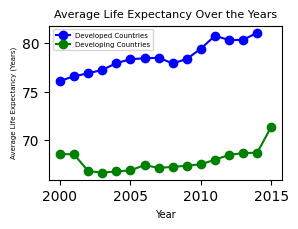

In [ ]:
from pyspark.sql.functions import col, avg
import matplotlib.pyplot as plt

le = le.dropna(subset=["Life expectancy ", "Year", "Status"])

developed = le.filter(col("Status") == "Developed")
developing = le.filter(col("Status") == "Developing")

developed_avg = developed.groupBy("Year").agg(avg("Life expectancy ").alias("avg_life_expectancy")).orderBy("Year")
developing_avg = developing.groupBy("Year").agg(avg("Life expectancy ").alias("avg_life_expectancy")).orderBy("Year")

developed_years = [row['Year'] for row in developed_avg.collect()]
developed_avg_life = [row['avg_life_expectancy'] for row in developed_avg.collect()]

developing_years = [row['Year'] for row in developing_avg.collect()]
developing_avg_life = [row['avg_life_expectancy'] for row in developing_avg.collect()]

plt.figure(figsize=(3, 2))

plt.plot(developed_years, developed_avg_life, label="Developed Countries", color="blue", marker='o')
plt.plot(developing_years, developing_avg_life, label="Developing Countries", color="green", marker='o')

plt.xlabel('Year', fontsize=7)
plt.ylabel('Average Life Expectancy (Years)', fontsize=5)
plt.title('Average Life Expectancy Over the Years', fontsize=8)
plt.legend(fontsize = 5)

plt.show()


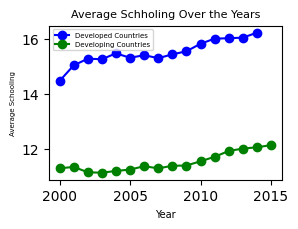

In [ ]:
from pyspark.sql.functions import col, avg
import matplotlib.pyplot as plt

le = le.dropna(subset=["Life expectancy ", "Year", "Status"])

developed = le.filter(col("Status") == "Developed")
developing = le.filter(col("Status") == "Developing")

developed_avg = developed.groupBy("Year").agg(avg("Schooling").alias("avg_schooling")).orderBy("Year")
developing_avg = developing.groupBy("Year").agg(avg("Schooling").alias("avg_schooling")).orderBy("Year")

developed_years = [row['Year'] for row in developed_avg.collect()]
developed_avg_life = [row['avg_schooling'] for row in developed_avg.collect()]

developing_years = [row['Year'] for row in developing_avg.collect()]
developing_avg_life = [row['avg_schooling'] for row in developing_avg.collect()]

plt.figure(figsize=(3, 2))

plt.plot(developed_years, developed_avg_life, label="Developed Countries", color="blue", marker='o')
plt.plot(developing_years, developing_avg_life, label="Developing Countries", color="green", marker='o')

plt.xlabel('Year', fontsize=7)
plt.ylabel('Average Schooling', fontsize=5)
plt.title('Average Schholing Over the Years', fontsize=8)
plt.legend(fontsize = 5)

plt.show()


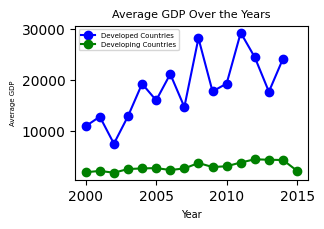

In [ ]:
from pyspark.sql.functions import col, avg
import matplotlib.pyplot as plt

le = le.dropna(subset=["Life expectancy ", "Year", "Status"])

developed = le.filter(col("Status") == "Developed")
developing = le.filter(col("Status") == "Developing")

developed_avg = developed.groupBy("Year").agg(avg("GDP").alias("avg_gdp")).orderBy("Year")
developing_avg = developing.groupBy("Year").agg(avg("GDP").alias("avg_gdp")).orderBy("Year")

developed_years = [row['Year'] for row in developed_avg.collect()]
developed_avg_life = [row['avg_gdp'] for row in developed_avg.collect()]

developing_years = [row['Year'] for row in developing_avg.collect()]
developing_avg_life = [row['avg_gdp'] for row in developing_avg.collect()]

plt.figure(figsize=(3, 2))

plt.plot(developed_years, developed_avg_life, label="Developed Countries", color="blue", marker='o')
plt.plot(developing_years, developing_avg_life, label="Developing Countries", color="green", marker='o')

plt.xlabel('Year', fontsize=7)
plt.ylabel('Average GDP', fontsize=5)
plt.title('Average GDP Over the Years', fontsize=8)
plt.legend(fontsize = 5)

plt.show()


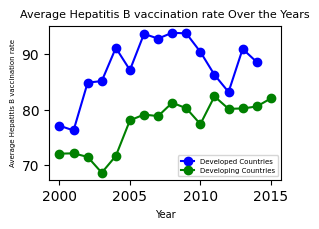

In [ ]:
from pyspark.sql.functions import col, avg
import matplotlib.pyplot as plt

le = le.dropna(subset=["Life expectancy ", "Year", "Status"])

developed = le.filter(col("Status") == "Developed")
developing = le.filter(col("Status") == "Developing")

developed_avg = developed.groupBy("Year").agg(avg("Hepatitis B").alias("avg_hepb")).orderBy("Year")
developing_avg = developing.groupBy("Year").agg(avg("Hepatitis B").alias("avg_hepb")).orderBy("Year")

developed_years = [row['Year'] for row in developed_avg.collect()]
developed_avg_life = [row['avg_hepb'] for row in developed_avg.collect()]

developing_years = [row['Year'] for row in developing_avg.collect()]
developing_avg_life = [row['avg_hepb'] for row in developing_avg.collect()]

plt.figure(figsize=(3, 2))

plt.plot(developed_years, developed_avg_life, label="Developed Countries", color="blue", marker='o')
plt.plot(developing_years, developing_avg_life, label="Developing Countries", color="green", marker='o')

plt.xlabel('Year', fontsize=7)
plt.ylabel('Average Hepatitis B vaccination rate', fontsize=5)
plt.title('Average Hepatitis B vaccination rate Over the Years', fontsize=8)
plt.legend(fontsize = 5)

plt.show()


##The following plots show life expectancy by countries

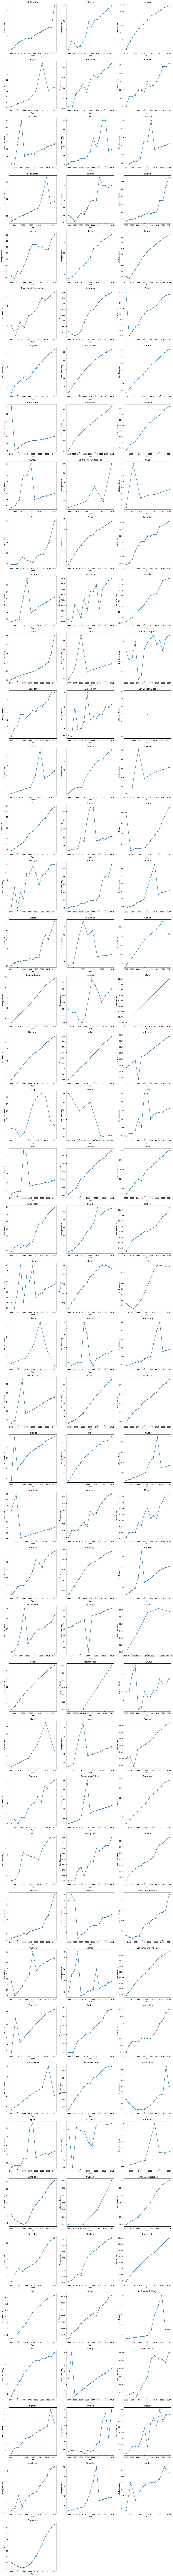

In [ ]:
fig, axes = plt.subplots(nrows=len(countries)//3 + 1, ncols=3, figsize=(15, 5*len(countries)//3 + 1))
axes = axes.flatten()

for i, country in enumerate(countries):
    country_data = le[le['Country'] == country]
    axes[i].plot(country_data['Year'], country_data['Life expectancy '], marker='o')
    axes[i].set_title(country)
    axes[i].set_xlabel('Year')
    axes[i].set_ylabel('Life Expectancy')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

##The following plots display the mean and median life expectancy for developed and developing countries. It is evident that the average life expectancy for developed countries is more than a decade greater than developing countries.

Mean is 67.69 years
Median is 69.10 years


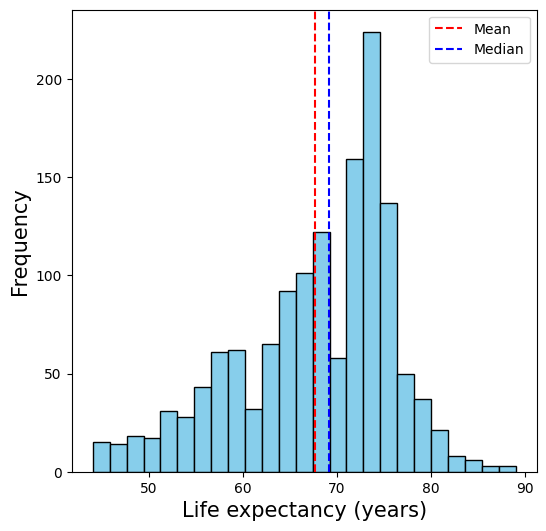

In [ ]:
from pyspark.sql.functions import mean

developing_countries = le.filter(le["Status"] == "Developing")

mean_value = developing_countries.select(mean("Life expectancy ").alias("mean")).collect()[0]["mean"]

median_value = developing_countries.approxQuantile("Life expectancy ", [0.5], 0.01)[0]

print(f"Mean is {mean_value:.2f} years")
print(f"Median is {median_value:.2f} years")


life_expectancy = developing_countries.select("Life expectancy ").rdd.flatMap(lambda x: x).collect()

fig = plt.figure(figsize=(6, 6))

plt.hist(life_expectancy, bins=25, color="skyblue", edgecolor="black")

plt.axvline(x=mean_value, color="red", linestyle="--", label="Mean")
plt.axvline(x=median_value, color="blue", linestyle="--", label="Median")

plt.ylabel("Frequency", fontsize=15)
plt.xlabel("Life expectancy (years)", fontsize=15)
plt.legend()

plt.show()


Mean is 78.69 years
Median is 78.80 years


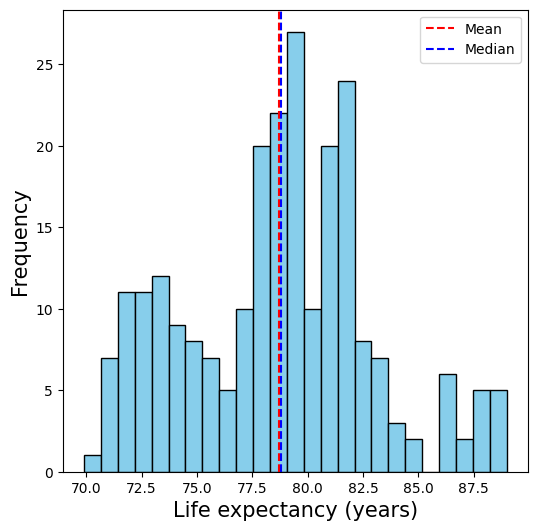

In [ ]:
from pyspark.sql.functions import mean

developed_countries = le.filter(le["Status"] == "Developed")

mean_value = developed_countries.select(mean("Life expectancy ").alias("mean")).collect()[0]["mean"]

median_value = developed_countries.approxQuantile("Life expectancy ", [0.5], 0.01)[0]

print(f"Mean is {mean_value:.2f} years")
print(f"Median is {median_value:.2f} years")


life_expectancy = developed_countries.select("Life expectancy ").rdd.flatMap(lambda x: x).collect()

fig = plt.figure(figsize=(6, 6))

plt.hist(life_expectancy, bins=25, color="skyblue", edgecolor="black")

plt.axvline(x=mean_value, color="red", linestyle="--", label="Mean")
plt.axvline(x=median_value, color="blue", linestyle="--", label="Median")

plt.ylabel("Frequency", fontsize=15)
plt.xlabel("Life expectancy (years)", fontsize=15)
plt.legend()

plt.show()


Mean is 3259.40
Median is 1229.96


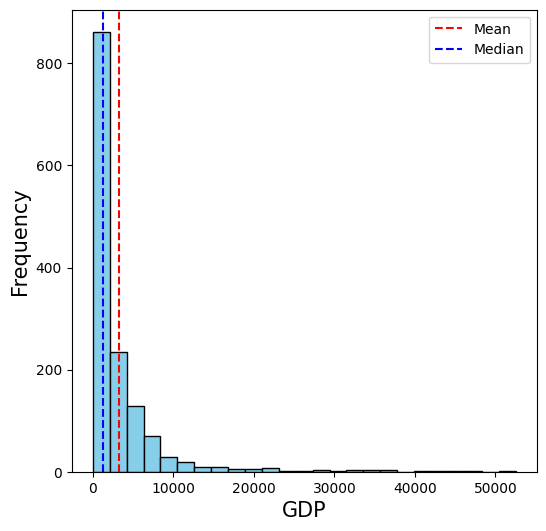

In [ ]:
from pyspark.sql.functions import mean

developing_countries = le.filter(le["Status"] == "Developing")

mean_value = developing_countries.select(mean("GDP").alias("mean")).collect()[0]["mean"]

median_value = developing_countries.approxQuantile("GDP", [0.5], 0.01)[0]

print(f"Mean is {mean_value:.2f}")
print(f"Median is {median_value:.2f}")


life_expectancy = developing_countries.select("GDP").rdd.flatMap(lambda x: x).collect()

fig = plt.figure(figsize=(6, 6))

plt.hist(life_expectancy, bins=25, color="skyblue", edgecolor="black")

plt.axvline(x=mean_value, color="red", linestyle="--", label="Mean")
plt.axvline(x=median_value, color="blue", linestyle="--", label="Median")

plt.ylabel("Frequency", fontsize=15)
plt.xlabel("GDP", fontsize=15)
plt.legend()

plt.show()


Mean is 18976.93
Median is 11326.22


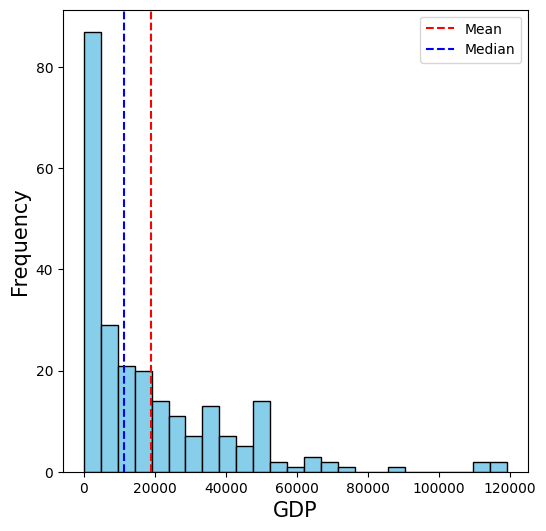

In [ ]:
from pyspark.sql.functions import mean

developed_countries = le.filter(le["Status"] == "Developed")

mean_value = developed_countries.select(mean("GDP").alias("mean")).collect()[0]["mean"]

median_value = developed_countries.approxQuantile("GDP", [0.5], 0.01)[0]

print(f"Mean is {mean_value:.2f}")
print(f"Median is {median_value:.2f}")


life_expectancy = developed_countries.select("GDP").rdd.flatMap(lambda x: x).collect()

fig = plt.figure(figsize=(6, 6))

plt.hist(life_expectancy, bins=25, color="skyblue", edgecolor="black")

plt.axvline(x=mean_value, color="red", linestyle="--", label="Mean")
plt.axvline(x=median_value, color="blue", linestyle="--", label="Median")

plt.ylabel("Frequency", fontsize=15)
plt.xlabel("GDP", fontsize=15)
plt.legend()

plt.show()


##Probability of life expectancy for developed versus developing countries

<Figure size 600x600 with 0 Axes>

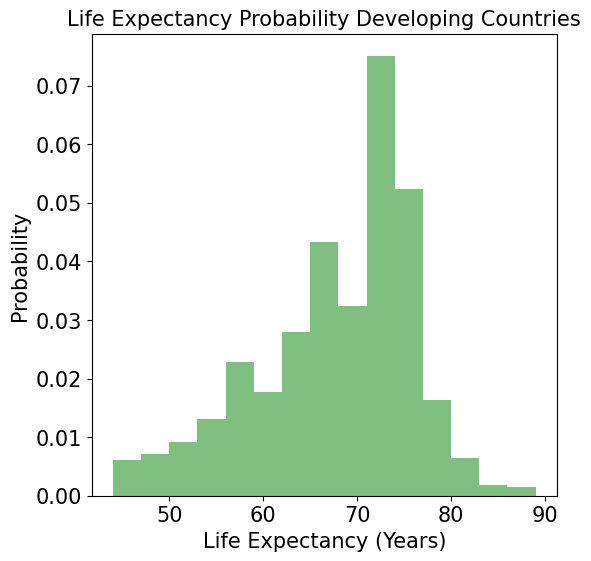

In [ ]:
le.dropna()
developing_data = le.filter(col("Status") == "Developing")

hist_fig = plt.figure(figsize = (6,6))

life_expectancy_values = developing_data.select("Life expectancy ").rdd.flatMap(lambda x: x).collect()

hist_fig = plt.figure(figsize=(6, 6))
plt.hist(life_expectancy_values, bins=15, density=True, alpha=0.5, color="green")

plt.tick_params(labelsize=15)
plt.title("Life Expectancy Probability Developing Countries", fontsize=15)
plt.ylabel("Probability", fontsize=15)
plt.xlabel("Life Expectancy (Years)", fontsize=15)

plt.show()


<Figure size 600x600 with 0 Axes>

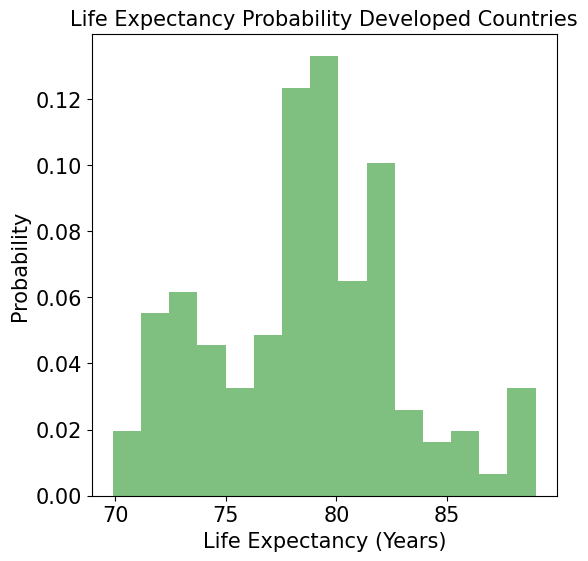

In [ ]:
le.dropna()
developed_data = le.filter(col("Status") == "Developed")

hist_fig = plt.figure(figsize = (6,6))

life_expectancy_values = developed_data.select("Life expectancy ").rdd.flatMap(lambda x: x).collect()

hist_fig = plt.figure(figsize=(6, 6))
plt.hist(life_expectancy_values, bins=15, density=True, alpha=0.5, color="green")

plt.tick_params(labelsize=15)
plt.title("Life Expectancy Probability Developed Countries", fontsize=15)
plt.ylabel("Probability", fontsize=15)
plt.xlabel("Life Expectancy (Years)", fontsize=15)

plt.show()


## Boxplots to display the differences in selected variables between developing and developed countries

<Figure size 1200x900 with 0 Axes>

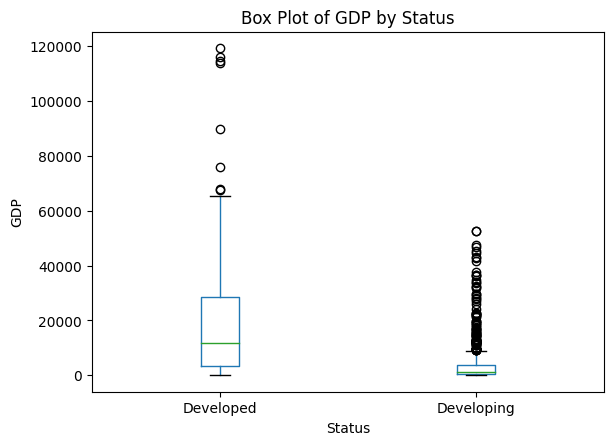

In [ ]:


le_pd = le.select("Status", "GDP").toPandas()

plt.figure(figsize=(12, 9))

le_pd.boxplot(column="GDP", by="Status", grid=False)

plt.title("Box Plot of GDP by Status")
plt.suptitle("")
plt.xlabel("Status")
plt.ylabel("GDP")
plt.show()


<Figure size 1200x900 with 0 Axes>

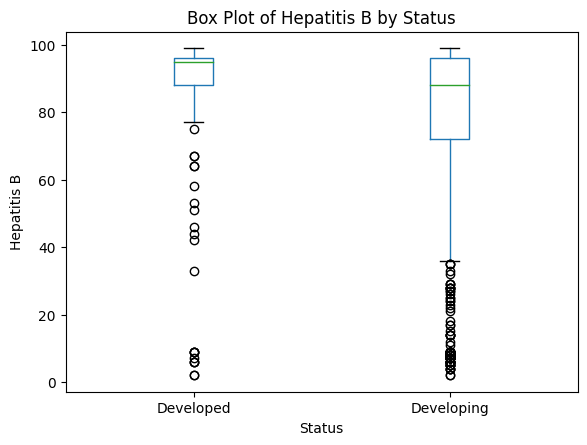

In [ ]:


le_pd = le.select("Status", "Hepatitis B").toPandas()

plt.figure(figsize=(12, 9))

le_pd.boxplot(column="Hepatitis B", by="Status", grid=False)

plt.title("Box Plot of Hepatitis B by Status")
plt.suptitle("")
plt.xlabel("Status")
plt.ylabel("Hepatitis B")
plt.show()


<Figure size 1200x900 with 0 Axes>

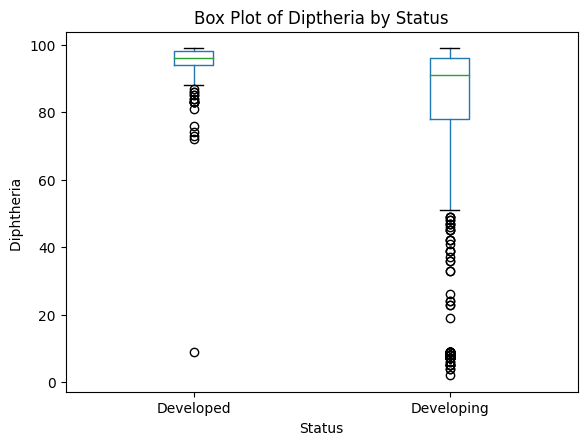

In [ ]:
le_pd = le.select("Status", "Diphtheria ").toPandas()

plt.figure(figsize=(12, 9))

le_pd.boxplot(column="Diphtheria ", by="Status", grid=False)

plt.title("Box Plot of Diptheria by Status")
plt.suptitle("")
plt.xlabel("Status")
plt.ylabel("Diphtheria ")
plt.show()


##The following plots represent the correlation between certain diseases in developed versus developing countries.

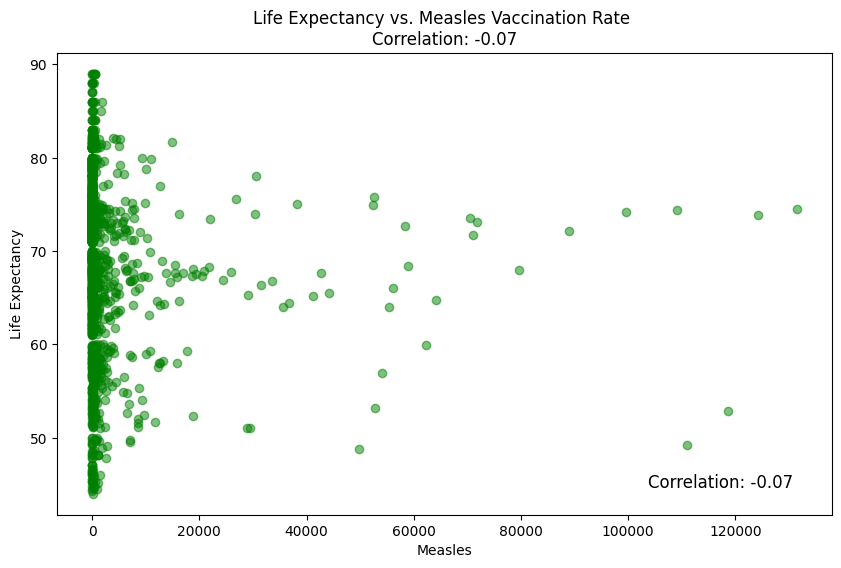

In [ ]:
from pyspark.sql.functions import col, corr
import matplotlib.pyplot as plt
correlation = df.select(corr('Measles ', 'Life expectancy ')).collect()[0][0]
data = df.select("Measles ", "Life expectancy ").collect()

plt.figure(figsize=(10, 6))
plt.scatter(
    [row['Measles '] for row in data],
    [row['Life expectancy '] for row in data],
    alpha=0.5,
    color='green'
)
plt.title(f"Life Expectancy vs. Measles Vaccination Rate \nCorrelation: {correlation:.2f}")
plt.xlabel("Measles")
plt.ylabel("Life Expectancy")

plt.text(
    0.95, 0.05, f'Correlation: {correlation:.2f}',
    fontsize=12, transform=plt.gca().transAxes,
    verticalalignment='bottom', horizontalalignment='right'
)

plt.show()


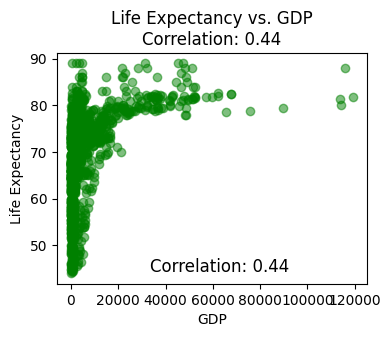

In [ ]:
from pyspark.sql.functions import col, corr
import matplotlib.pyplot as plt
df = le
correlation = df.select(corr('GDP', 'Life expectancy ')).collect()[0][0]
data = df.select("GDP", "Life expectancy ").collect()

plt.figure(figsize=(4, 3))
plt.scatter(
    [row['GDP'] for row in data],
    [row['Life expectancy '] for row in data],
    alpha=0.5,
    color='green'
)
plt.title(f"Life Expectancy vs. GDP\nCorrelation: {correlation:.2f}")
plt.xlabel("GDP")
plt.ylabel("Life Expectancy")

plt.text(
    0.75, 0.035, f'Correlation: {correlation:.2f}',
    fontsize=12, transform=plt.gca().transAxes,
    verticalalignment='bottom', horizontalalignment='right'
)

plt.show()


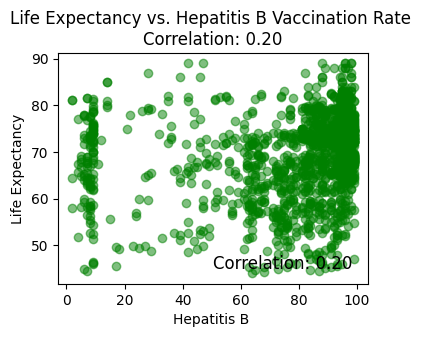

In [ ]:

df = le
correlation = df.select(corr('Hepatitis B', 'Life expectancy ')).collect()[0][0]
data = df.select("Hepatitis B", "Life expectancy ").collect()

plt.figure(figsize=(4, 3))
plt.scatter(
    [row['Hepatitis B'] for row in data],
    [row['Life expectancy '] for row in data],
    alpha=0.5,
    color='green'
)
plt.title(f"Life Expectancy vs. Hepatitis B Vaccination Rate \nCorrelation: {correlation:.2f}")
plt.xlabel("Hepatitis B ")
plt.ylabel("Life Expectancy")

plt.text(
    0.95, 0.05, f'Correlation: {correlation:.2f}',
    fontsize=12, transform=plt.gca().transAxes,
    verticalalignment='bottom', horizontalalignment='right'
)

plt.show()


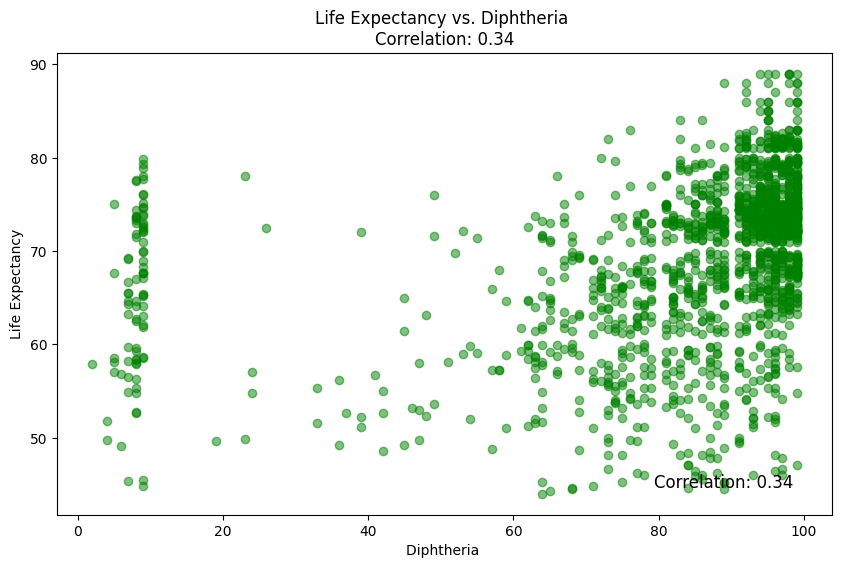

In [ ]:
from pyspark.sql.functions import col, corr
import matplotlib.pyplot as plt
df = le
correlation = df.select(corr('Diphtheria ', 'Life expectancy ')).collect()[0][0]
data = df.select("Diphtheria ", "Life expectancy ").collect()

plt.figure(figsize=(10, 6))
plt.scatter(
    [row['Diphtheria '] for row in data],
    [row['Life expectancy '] for row in data],
    alpha=0.5,
    color='green'
)
plt.title(f"Life Expectancy vs. Diphtheria \nCorrelation: {correlation:.2f}")
plt.xlabel("Diphtheria ")
plt.ylabel("Life Expectancy")

plt.text(
    0.95, 0.05, f'Correlation: {correlation:.2f}',
    fontsize=12, transform=plt.gca().transAxes,
    verticalalignment='bottom', horizontalalignment='right'
)

plt.show()


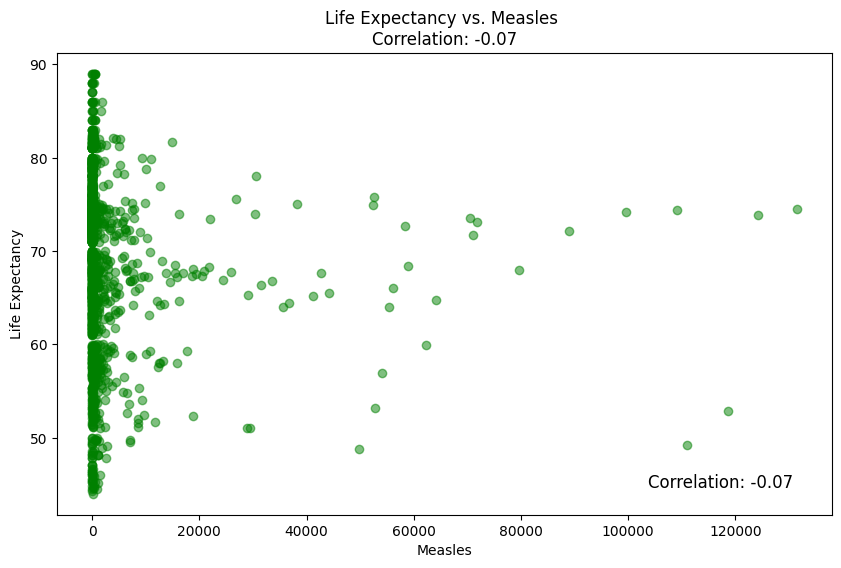

In [ ]:
from pyspark.sql.functions import col, corr
import matplotlib.pyplot as plt
df = le
correlation = df.select(corr('Measles ', 'Life expectancy ')).collect()[0][0]
data = df.select("Measles ", "Life expectancy ").collect()

plt.figure(figsize=(10, 6))
plt.scatter(
    [row['Measles '] for row in data],
    [row['Life expectancy '] for row in data],
    alpha=0.5,
    color='green'
)
plt.title(f"Life Expectancy vs. Measles \nCorrelation: {correlation:.2f}")
plt.xlabel("Measles")
plt.ylabel("Life Expectancy")

plt.text(
    0.95, 0.05, f'Correlation: {correlation:.2f}',
    fontsize=12, transform=plt.gca().transAxes,
    verticalalignment='bottom', horizontalalignment='right'
)

plt.show()


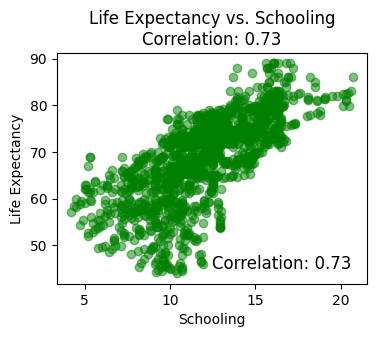

In [ ]:
from pyspark.sql.functions import col, corr
import matplotlib.pyplot as plt
df = le
correlation = df.select(corr('Schooling', 'Life expectancy ')).collect()[0][0]
data = df.select("Schooling", "Life expectancy ").collect()

plt.figure(figsize=(4, 3))
plt.scatter(
    [row['Schooling'] for row in data],
    [row['Life expectancy '] for row in data],
    alpha=0.5,
    color='green'
)
plt.title(f"Life Expectancy vs. Schooling\nCorrelation: {correlation:.2f}")
plt.xlabel("Schooling")
plt.ylabel("Life Expectancy")

plt.text(
    0.95, 0.05, f'Correlation: {correlation:.2f}',
    fontsize=12, transform=plt.gca().transAxes,
    verticalalignment='bottom', horizontalalignment='right'
)

plt.show()


#Machine Learning Models

In [ ]:
from pyspark.mllib.regression import LabeledPoint, LinearRegressionWithSGD
from pyspark.mllib.evaluation import RegressionMetrics

df = le


features_cols = ['Diphtheria ', 'Measles ', 'Hepatitis B']
target_col = 'Life expectancy '

data_rdd = df.rdd.map(lambda row: LabeledPoint(row[target_col], [row[col] for col in features_cols]))



model = LinearRegressionWithSGD.train(data_rdd, iterations=100, step=0.000001, intercept=True)
print(model)
print(f'\n{model.weights}')
print(f'\n{model.intercept}')


predictions = data_rdd.map(lambda lp: (float(model.predict(lp.features)), lp.label))

metrics = RegressionMetrics(predictions)
print("Root Mean Squared Error (RMSE):", metrics.rootMeanSquaredError)
print("R-squared:", metrics.r2)


/usr/local/lib/python3.10/dist-packages/pyspark/mllib/regression.py:365: FutureWarning: Deprecated in 2.0.0. Use ml.regression.LinearRegression.
  warnings.warn("Deprecated in 2.0.0. Use ml.regression.LinearRegression.", FutureWarning)


(weights=[-2.032952937325969e+115,-1.2421924936995292e+118,-1.6782021965707568e+115], intercept=-2.592195239676052e+113)

[-2.032952937325969e+115,-1.2421924936995292e+118,-1.6782021965707568e+115]

-2.592195239676052e+113


/usr/local/lib/python3.10/dist-packages/pyspark/sql/context.py:158: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


Root Mean Squared Error (RMSE): 1.2825963792300917e+122
R-squared: -2.1271134838787404e+242


In [ ]:
from pyspark.mllib.regression import LabeledPoint, LinearRegressionWithSGD
from pyspark.mllib.evaluation import RegressionMetrics

df = le


features_cols = ['Schooling']
target_col = 'Life expectancy '

data_rdd = df.rdd.map(lambda row: LabeledPoint(row[target_col], [row[col] for col in features_cols]))



model = LinearRegressionWithSGD.train(data_rdd, iterations=100, step=0.1, intercept=True)
print(model)
print(f'\n{model.weights}')
print(f'\n{model.intercept}')


predictions = data_rdd.map(lambda lp: (float(model.predict(lp.features)), lp.label))

metrics = RegressionMetrics(predictions)
print("Root Mean Squared Error (RMSE):", metrics.rootMeanSquaredError)
print("R-squared:", metrics.r2)


(weights=[-964998154147967.5], intercept=-75626214884577.44)

[-964998154147967.5]

-75626214884577.44
Root Mean Squared Error (RMSE): 1.2076249349426762e+16
R-squared: -1.8857094822680652e+30


In [ ]:
from pyspark.mllib.regression import LabeledPoint, LinearRegressionWithSGD
from pyspark.mllib.evaluation import RegressionMetrics

df = le


features_cols = ['GDP']
target_col = 'Life expectancy '

data_rdd = df.rdd.map(lambda row: LabeledPoint(row[target_col], [row[col] for col in features_cols]))


train_rdd, test_rdd = data_rdd.randomSplit([0.7, 0.3])

model = LinearRegressionWithSGD.train(train_rdd, iterations=100, step=0.000001, intercept=True)
print(model)
print(f'\n{model.weights}')
print(f'\n{model.intercept}')


predictions = test_rdd.map(lambda lp: (float(model.predict(lp.features)), lp.label))

metrics = RegressionMetrics(predictions)
print("Root Mean Squared Error (RMSE):", metrics.rootMeanSquaredError)
print("R-squared:", metrics.r2)


(weights=[-1.4509709212633778e+138], intercept=-5.031296693737488e+133)

[-1.4509709212633778e+138]

-5.031296693737488e+133
Root Mean Squared Error (RMSE): 1.8289254389075304e+142
R-squared: -4.2891839725560856e+282


In [ ]:
from pyspark.ml.feature import VectorAssembler, StringIndexer, Bucketizer
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml import Pipeline
from pyspark.ml.evaluation import MulticlassClassificationEvaluator


feature_columns = ['Diphtheria ', 'Measles ', 'Hepatitis B']

assembler = VectorAssembler(inputCols=feature_columns, outputCol="features")
df_assembled = assembler.transform(df)

bucketizer = Bucketizer(splits=[0, 50, 60, 70, 80, float('inf')], inputCol="Life expectancy ", outputCol="label")
df_assembled = bucketizer.transform(df_assembled)

(train_data, test_data) = df_assembled.randomSplit([0.8, 0.2], seed=1234)

rf = RandomForestClassifier(labelCol="label", featuresCol="features")

pipeline = Pipeline(stages=[rf])

model = pipeline.fit(train_data)

predictions = model.transform(test_data)

evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="accuracy")
accuracy = evaluator.evaluate(predictions)
print(f"Test set accuracy = {accuracy}")

Test set accuracy = 0.5669781931464174


In [ ]:
from pyspark.ml.feature import VectorAssembler, StringIndexer, Bucketizer
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml import Pipeline
from pyspark.ml.evaluation import MulticlassClassificationEvaluator


feature_columns = ['GDP']

assembler = VectorAssembler(inputCols=feature_columns, outputCol="features")
df_assembled = assembler.transform(df)

bucketizer = Bucketizer(splits=[0, 50, 60, 70, 80, float('inf')], inputCol="Life expectancy ", outputCol="label")
df_assembled = bucketizer.transform(df_assembled)

(train_data, test_data) = df_assembled.randomSplit([0.8, 0.2], seed=1234)

rf = RandomForestClassifier(labelCol="label", featuresCol="features")

pipeline = Pipeline(stages=[rf])

model = pipeline.fit(train_data)

predictions = model.transform(test_data)

evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="accuracy")
accuracy = evaluator.evaluate(predictions)
print(f"Test set accuracy = {accuracy}")

Test set accuracy = 0.5451713395638629


In [ ]:
from pyspark.ml.feature import VectorAssembler, StringIndexer, Bucketizer
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml import Pipeline
from pyspark.ml.evaluation import MulticlassClassificationEvaluator


feature_columns = ['Schooling']

assembler = VectorAssembler(inputCols=feature_columns, outputCol="features")
df_assembled = assembler.transform(df)

bucketizer = Bucketizer(splits=[0, 50, 60, 70, 80, float('inf')], inputCol="Life expectancy ", outputCol="label")
df_assembled = bucketizer.transform(df_assembled)

(train_data, test_data) = df_assembled.randomSplit([0.8, 0.2], seed=1234)

rf = RandomForestClassifier(labelCol="label", featuresCol="features")

pipeline = Pipeline(stages=[rf])

model = pipeline.fit(train_data)

predictions = model.transform(test_data)

evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="accuracy")
accuracy = evaluator.evaluate(predictions)
print(f"Test set accuracy = {accuracy}")

Test set accuracy = 0.6230529595015576


In [ ]:
from pyspark.ml.feature import VectorAssembler, StringIndexer, Bucketizer
from pyspark.ml.classification import NaiveBayes
from pyspark.ml import Pipeline
from pyspark.ml.evaluation import MulticlassClassificationEvaluator


feature_columns = ['Diphtheria ', 'Measles ', 'Hepatitis B']


assembler = VectorAssembler(inputCols=feature_columns, outputCol="features")
df_assembled = assembler.transform(df)

bucketizer = Bucketizer(splits=[0, 50, 60, 70, 80, float('inf')], inputCol="Life expectancy ", outputCol="label")
df_assembled = bucketizer.transform(df_assembled)

(train_data, test_data) = df_assembled.randomSplit([0.8, 0.2], seed=1234)

nb = NaiveBayes(labelCol="label", featuresCol="features")

pipeline = Pipeline(stages=[nb])

model = pipeline.fit(train_data)

predictions = model.transform(test_data)

evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="accuracy")
accuracy = evaluator.evaluate(predictions)
print(f"Test set accuracy = {accuracy}")

Test set accuracy = 0.13707165109034267


In [ ]:
from pyspark.ml.feature import VectorAssembler, StringIndexer, Bucketizer
from pyspark.ml.classification import NaiveBayes
from pyspark.ml import Pipeline
from pyspark.ml.evaluation import MulticlassClassificationEvaluator


feature_columns = ['GDP']


assembler = VectorAssembler(inputCols=feature_columns, outputCol="features")
df_assembled = assembler.transform(df)

bucketizer = Bucketizer(splits=[0, 50, 60, 70, 80, float('inf')], inputCol="Life expectancy ", outputCol="label")
df_assembled = bucketizer.transform(df_assembled)

(train_data, test_data) = df_assembled.randomSplit([0.8, 0.2], seed=1234)

nb = NaiveBayes(labelCol="label", featuresCol="features")

pipeline = Pipeline(stages=[nb])

model = pipeline.fit(train_data)

predictions = model.transform(test_data)

evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="accuracy")
accuracy = evaluator.evaluate(predictions)
print(f"Test set accuracy = {accuracy}")

Test set accuracy = 0.45482866043613707


In [ ]:
from pyspark.ml.feature import VectorAssembler, StringIndexer, Bucketizer
from pyspark.ml.classification import NaiveBayes
from pyspark.ml import Pipeline
from pyspark.ml.evaluation import MulticlassClassificationEvaluator


feature_columns = ['Schooling']


assembler = VectorAssembler(inputCols=feature_columns, outputCol="features")
df_assembled = assembler.transform(df)

bucketizer = Bucketizer(splits=[0, 50, 60, 70, 80, float('inf')], inputCol="Life expectancy ", outputCol="label")
df_assembled = bucketizer.transform(df_assembled)

(train_data, test_data) = df_assembled.randomSplit([0.8, 0.2], seed=1234)

nb = NaiveBayes(labelCol="label", featuresCol="features")

pipeline = Pipeline(stages=[nb])

model = pipeline.fit(train_data)

predictions = model.transform(test_data)

evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="accuracy")
accuracy = evaluator.evaluate(predictions)
print(f"Test set accuracy = {accuracy}")

Test set accuracy = 0.45482866043613707
